In [24]:
### REGRESIÓ LOGISTICA (Tumor)

In [25]:
# Exemple regressió LOGÍSTICA amb w3schools
# Relació lineal entre la mida d'un tumor en cms i el diagnóstic positivu o negatiu de cancer

In [26]:
import numpy
from sklearn import linear_model

#Reshaped for Logistic function.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))
print(predicted) 


[0]


In [27]:
log_odds = logr.coef_
odds = numpy.exp(log_odds)
print(logr.coef_)
print(odds)

[[1.39510954]]
[[4.03541657]]


In [28]:
e = 2.71
print (e ** 1.39510954)
print (numpy.log (4.0182))

4.0182743786365664
1.3908340411619224


In [29]:
import numpy
from sklearn import linear_model

def logit2prob(logr, X):
    # Multiplica x pel coeficient i li suma el punt d'intersecció
    # 
    log_odds = logr.coef_ * X + logr.intercept_
    #
    # cacula e**log_odds. 
    # 
    odds = numpy.exp(log_odds)
    probability = odds / (1 + odds)
    return(probability)


X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 
                                               4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

list_probs = logit2prob(logr, X)

# Imprimeix tu la llista de mesures i probabilitats

In [30]:
## CERCA DE GRAELLA (MILLOR MODEL) Exemple : Iris

In [31]:
# Comencem per analitzar una regressió logística de classificació del dataset iris

from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

X = iris['data']
y = iris['target']

logit = LogisticRegression(max_iter = 10000)

print(logit.fit(X,y))
print(logit.score(X,y))


LogisticRegression(max_iter=10000)
0.9733333333333334


In [32]:
# Volem trobar un model millor, farem variar un paràmetre i calcularem
# La regressió usant aquestes variants del model, 
# diferent nivell de Complexitat (0,25 a 2)

Complex = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
scores = []

for c in Complex:
    logit.set_params(C=c)
    logit.fit(X, y)
    scores.append((c, logit.score(X, y)))
    print(scores[-1])

(0.25, 0.9666666666666667)
(0.5, 0.9666666666666667)
(0.75, 0.9733333333333334)
(1, 0.9733333333333334)
(1.25, 0.98)
(1.5, 0.98)
(1.75, 0.9866666666666667)
(2, 0.9866666666666667)


In [33]:
# Càlculo del punto de corte de la muestra para 80/20
corte = int(len(iris['data']) * 0.8)
X_train = iris['data'][:corte]
y_train = iris['target'][:corte]
X_test = iris['data'][corte:]
y_test = iris['target'][corte:]

logit = LogisticRegression(max_iter = 10000)

print("train: ", logit.fit(X_train,y_train))
print("train: ", logit.score(X_train,y_train))
print("test: ", logit.score(X_test,y_test))

train:  LogisticRegression(max_iter=10000)
train:  0.9833333333333333
test:  0.8333333333333334


In [34]:
corte

120

In [35]:
predictions = logit.predict(X_train)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1])

In [38]:
actual = y_train
predicted = predictions
print (actual)
print (predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1]


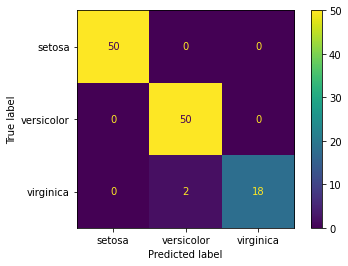

In [39]:
from sklearn import metrics

cm = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels=iris['target_names'])

cm_display.plot()
plt.show()